In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
import pandas as pd
import os, shutil
import matplotlib.pyplot as plt

In [33]:
base_dir = '/Users/mo/Documents/University/3rdYear/The Final Project folder/CNN model/newDS2'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(50, 50),
        batch_size=64,
        class_mode='categorical',
        subset = 'training',
        shuffle = True)

validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(50, 50),
        batch_size=64,
        class_mode='categorical',
        shuffle=True,
        subset = 'validation'
        )
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(50, 50),
        batch_size=64,
        class_mode='categorical'
        )

Found 53926 images belonging to 29 classes.
Found 23082 images belonging to 29 classes.
Found 14500 images belonging to 29 classes.


In [35]:
def accPlot():
    history_dict['accuracy']

    plt.clf()
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']

    epochs = range(1, len(acc) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, acc, blue_dots, label = 'Training acc')
    plt.plot(epochs, val_acc, solid_blue_line, label = 'Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()
def lossPlot():
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, loss, blue_dots, label = 'Training loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Standard model

This model is the standard starting baseline

In [36]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten()) 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(29, activation='softmax'))
model.summary()

model.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'],)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_94 (Conv2D)           (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                247872    
_________________________________________________________________
dense_15 (Dense)             (None, 29)              

In [37]:
history = model.fit(
      train_generator,
      steps_per_epoch=800,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=300)

Epoch 1/20
800/800 [==============================] - 113s 140ms/step - loss: 1.7536 - accuracy: 0.4934 - val_loss: 1.8792 - val_accuracy: 0.4383
Epoch 2/20
800/800 [==============================] - 105s 132ms/step - loss: 0.5774 - accuracy: 0.8261 - val_loss: 1.9643 - val_accuracy: 0.4796
Epoch 3/20
800/800 [==============================] - 104s 131ms/step - loss: 0.2580 - accuracy: 0.9207 - val_loss: 2.1462 - val_accuracy: 0.5175
Epoch 4/20
800/800 [==============================] - 105s 131ms/step - loss: 0.1397 - accuracy: 0.9567 - val_loss: 2.3857 - val_accuracy: 0.5173
Epoch 5/20
800/800 [==============================] - 108s 134ms/step - loss: 0.0840 - accuracy: 0.9729 - val_loss: 2.1352 - val_accuracy: 0.5935
Epoch 6/20
800/800 [==============================] - 97s 121ms/step - loss: 0.0566 - accuracy: 0.9818 - val_loss: 2.5401 - val_accuracy: 0.5804
Epoch 7/20
800/800 [==============================] - 814s 1s/step - loss: 0.0395 - accuracy: 0.9880 - val_loss: 2.5563 - val

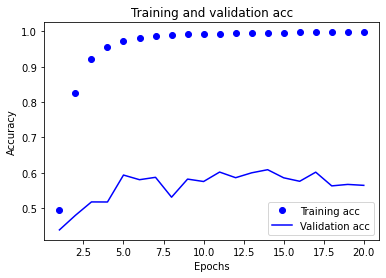

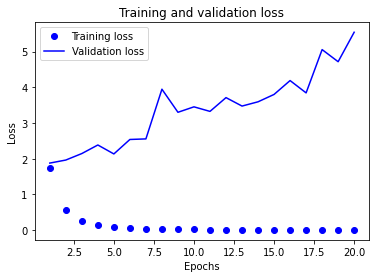

In [39]:
history_dict = history.history
history_dict.keys()
accPlot()
lossPlot()

# Layer changes

Experimentation with the optimal amont of layer depth

In [40]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten()) 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(29, activation='softmax'))
model.summary()

model.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'],)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_96 (Conv2D)           (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 22, 22, 16)        2320      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 9, 9, 32)          4640      
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 2, 2, 32)        

In [41]:
history = model.fit(
      train_generator,
      steps_per_epoch=800,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=300)

Epoch 1/20
800/800 [==============================] - 117s 146ms/step - loss: 2.0878 - accuracy: 0.3791 - val_loss: 1.9324 - val_accuracy: 0.4192
Epoch 2/20
800/800 [==============================] - 110s 137ms/step - loss: 0.9057 - accuracy: 0.7034 - val_loss: 1.6263 - val_accuracy: 0.5285
Epoch 3/20
800/800 [==============================] - 106s 132ms/step - loss: 0.5130 - accuracy: 0.8274 - val_loss: 1.8859 - val_accuracy: 0.5711
Epoch 4/20
800/800 [==============================] - 108s 135ms/step - loss: 0.3280 - accuracy: 0.8893 - val_loss: 1.8088 - val_accuracy: 0.5806
Epoch 5/20
800/800 [==============================] - 108s 135ms/step - loss: 0.2257 - accuracy: 0.9257 - val_loss: 1.8770 - val_accuracy: 0.6360
Epoch 6/20
800/800 [==============================] - 83s 104ms/step - loss: 0.1665 - accuracy: 0.9444 - val_loss: 2.1495 - val_accuracy: 0.6316
Epoch 7/20
800/800 [==============================] - 71s 88ms/step - loss: 0.1297 - accuracy: 0.9566 - val_loss: 2.4416 - va

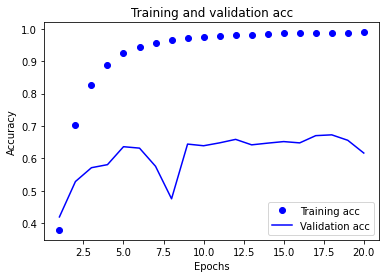

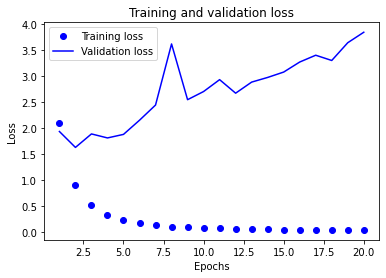

In [42]:
history_dict = history.history
history_dict.keys()
accPlot()
lossPlot()

In [13]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten()) 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(29, activation='softmax'))
model.summary()

model.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'],)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 16)        448       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 46, 46, 16)        2320      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 44, 44, 16)        2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 22, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 20, 20, 32)        4640      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 18, 18, 32)        9248      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 32)       

In [14]:
history = model.fit(
      train_generator,
      steps_per_epoch=800,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=300)

Epoch 1/20
800/800 [==============================] - 150s 186ms/step - loss: 1.5709 - accuracy: 0.5427 - val_loss: 2.2790 - val_accuracy: 0.4369
Epoch 2/20
800/800 [==============================] - 143s 179ms/step - loss: 0.3161 - accuracy: 0.9015 - val_loss: 2.1519 - val_accuracy: 0.5660
Epoch 3/20
800/800 [==============================] - 155s 193ms/step - loss: 0.1277 - accuracy: 0.9601 - val_loss: 2.5904 - val_accuracy: 0.5853
Epoch 4/20
800/800 [==============================] - 142s 177ms/step - loss: 0.0739 - accuracy: 0.9777 - val_loss: 2.9879 - val_accuracy: 0.6160
Epoch 5/20
800/800 [==============================] - 142s 177ms/step - loss: 0.0520 - accuracy: 0.9848 - val_loss: 3.1493 - val_accuracy: 0.6004
Epoch 6/20
800/800 [==============================] - 142s 177ms/step - loss: 0.0423 - accuracy: 0.9877 - val_loss: 3.5173 - val_accuracy: 0.6176
Epoch 7/20
800/800 [==============================] - 143s 178ms/step - loss: 0.0358 - accuracy: 0.9907 - val_loss: 3.8016 -

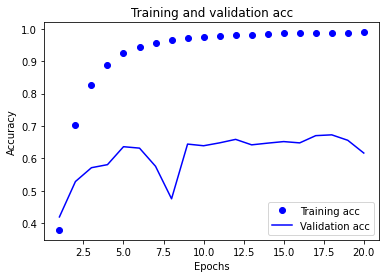

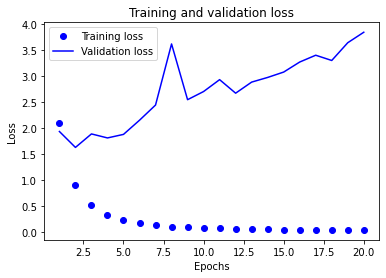

In [44]:
history_dict = history.history
history_dict.keys()
accPlot()
lossPlot()

In [45]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten()) 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(29, activation='softmax'))
model.summary()

model.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'],)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 48, 48, 16)        448       
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 46, 46, 16)        2320      
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 44, 44, 16)        2320      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 22, 22, 16)        0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 20, 20, 32)        4640      
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 18, 18, 32)        9248      
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 16, 16, 32)      

In [46]:
history = model.fit(
      train_generator,
      steps_per_epoch=800,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=300)

Epoch 1/20
800/800 [==============================] - 157s 195ms/step - loss: 2.0605 - accuracy: 0.3816 - val_loss: 1.7019 - val_accuracy: 0.4755
Epoch 2/20
800/800 [==============================] - 154s 192ms/step - loss: 0.5563 - accuracy: 0.8176 - val_loss: 1.7281 - val_accuracy: 0.5809
Epoch 3/20
800/800 [==============================] - 155s 193ms/step - loss: 0.2342 - accuracy: 0.9241 - val_loss: 1.2959 - val_accuracy: 0.6413
Epoch 4/20
800/800 [==============================] - 152s 190ms/step - loss: 0.1384 - accuracy: 0.9569 - val_loss: 1.6213 - val_accuracy: 0.6948
Epoch 5/20
800/800 [==============================] - 154s 192ms/step - loss: 0.0971 - accuracy: 0.9711 - val_loss: 2.2443 - val_accuracy: 0.6348
Epoch 6/20
800/800 [==============================] - 158s 198ms/step - loss: 0.0728 - accuracy: 0.9791 - val_loss: 2.8281 - val_accuracy: 0.6606
Epoch 7/20
800/800 [==============================] - 159s 198ms/step - loss: 0.0652 - accuracy: 0.9824 - val_loss: 1.9820 -

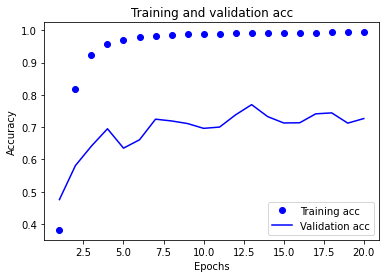

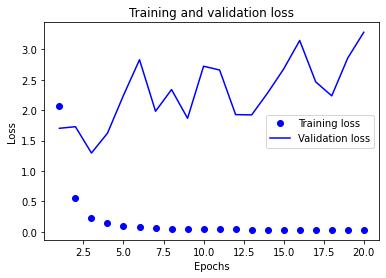

In [47]:
history_dict = history.history
history_dict.keys()
accPlot()
lossPlot()

# Filters

Filter experimentation to find the optimal filters

In [48]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.Conv2D(4, (3, 3), activation='relu'))
model.add(layers.Conv2D(4, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten()) 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(29, activation='softmax'))
model.summary()

model.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'],)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_109 (Conv2D)          (None, 48, 48, 4)         112       
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 46, 46, 4)         148       
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 44, 44, 4)         148       
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 22, 22, 4)         0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 20, 20, 8)         296       
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 18, 18, 8)         584       
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 16, 16, 8)       

In [49]:
history = model.fit(
      train_generator,
      steps_per_epoch=800,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=300)

Epoch 1/20
800/800 [==============================] - 118s 146ms/step - loss: 2.5970 - accuracy: 0.2366 - val_loss: 2.5485 - val_accuracy: 0.2998
Epoch 2/20
800/800 [==============================] - 115s 144ms/step - loss: 1.3452 - accuracy: 0.5692 - val_loss: 2.1726 - val_accuracy: 0.3898
Epoch 3/20
800/800 [==============================] - 114s 143ms/step - loss: 0.8257 - accuracy: 0.7258 - val_loss: 2.3812 - val_accuracy: 0.4669
Epoch 4/20
800/800 [==============================] - 114s 142ms/step - loss: 0.5646 - accuracy: 0.8113 - val_loss: 2.6396 - val_accuracy: 0.4546
Epoch 5/20
800/800 [==============================] - 115s 144ms/step - loss: 0.4173 - accuracy: 0.8587 - val_loss: 2.3404 - val_accuracy: 0.5094
Epoch 6/20
800/800 [==============================] - 116s 145ms/step - loss: 0.3187 - accuracy: 0.8931 - val_loss: 2.5381 - val_accuracy: 0.5214
Epoch 7/20
800/800 [==============================] - 116s 145ms/step - loss: 0.2583 - accuracy: 0.9128 - val_loss: 2.9494 -

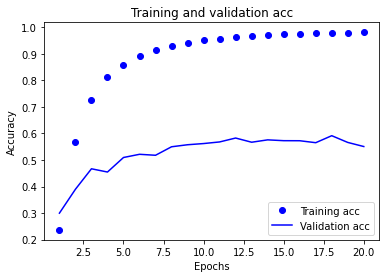

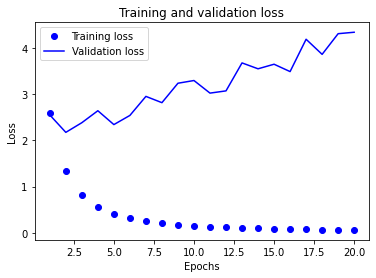

In [50]:
history_dict = history.history
history_dict.keys()
accPlot()
lossPlot()

In [52]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten()) 
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(29, activation='softmax'))
model.summary()

model.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'],)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_127 (Conv2D)          (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 46, 46, 32)        9248      
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 16, 16, 64)      

In [53]:
history = model.fit(
      train_generator,
      steps_per_epoch=800,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=300)

Epoch 1/20
800/800 [==============================] - 263s 325ms/step - loss: 2.0938 - accuracy: 0.3790 - val_loss: 1.4074 - val_accuracy: 0.6003
Epoch 2/20
800/800 [==============================] - 266s 332ms/step - loss: 0.3578 - accuracy: 0.8830 - val_loss: 2.3252 - val_accuracy: 0.5811
Epoch 3/20
800/800 [==============================] - 259s 324ms/step - loss: 0.1492 - accuracy: 0.9544 - val_loss: 1.3466 - val_accuracy: 0.7486
Epoch 4/20
800/800 [==============================] - 257s 322ms/step - loss: 0.0923 - accuracy: 0.9738 - val_loss: 1.3457 - val_accuracy: 0.7728
Epoch 5/20
800/800 [==============================] - 258s 322ms/step - loss: 0.0671 - accuracy: 0.9824 - val_loss: 1.1472 - val_accuracy: 0.7572
Epoch 6/20
800/800 [==============================] - 252s 315ms/step - loss: 0.0557 - accuracy: 0.9857 - val_loss: 1.7044 - val_accuracy: 0.7471
Epoch 7/20
800/800 [==============================] - 242s 302ms/step - loss: 0.0505 - accuracy: 0.9887 - val_loss: 2.1947 -

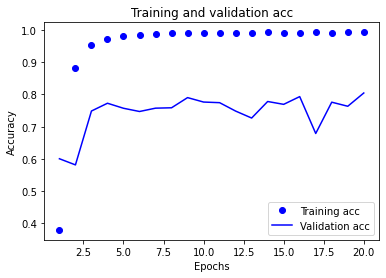

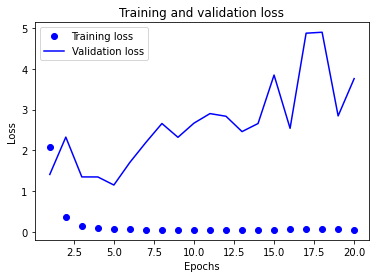

In [54]:
history_dict = history.history
history_dict.keys()
accPlot()
lossPlot()

In [55]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten()) 
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(29, activation='softmax'))
model.summary()

model.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'],)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_136 (Conv2D)          (None, 48, 48, 64)        1792      
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 46, 46, 64)        36928     
_________________________________________________________________
conv2d_138 (Conv2D)          (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_139 (Conv2D)          (None, 20, 20, 128)       73856     
_________________________________________________________________
conv2d_140 (Conv2D)          (None, 18, 18, 128)       147584    
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 16, 16, 128)     

In [56]:
history = model.fit(
      train_generator,
      steps_per_epoch=800,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=300)

Epoch 1/20
800/800 [==============================] - 652s 813ms/step - loss: 2.4977 - accuracy: 0.2703 - val_loss: 1.8373 - val_accuracy: 0.4370
Epoch 2/20
800/800 [==============================] - 652s 815ms/step - loss: 0.4142 - accuracy: 0.8670 - val_loss: 1.7247 - val_accuracy: 0.6553
Epoch 3/20
800/800 [==============================] - 649s 812ms/step - loss: 0.1416 - accuracy: 0.9594 - val_loss: 2.0071 - val_accuracy: 0.6686
Epoch 4/20
800/800 [==============================] - 651s 814ms/step - loss: 0.1022 - accuracy: 0.9766 - val_loss: 1.9708 - val_accuracy: 0.7339
Epoch 5/20
800/800 [==============================] - 651s 814ms/step - loss: 0.0867 - accuracy: 0.9815 - val_loss: 2.8673 - val_accuracy: 0.6830
Epoch 6/20
800/800 [==============================] - 648s 809ms/step - loss: 0.0891 - accuracy: 0.9832 - val_loss: 2.9269 - val_accuracy: 0.7105
Epoch 7/20
800/800 [==============================] - 652s 815ms/step - loss: 0.0759 - accuracy: 0.9859 - val_loss: 3.2523 -

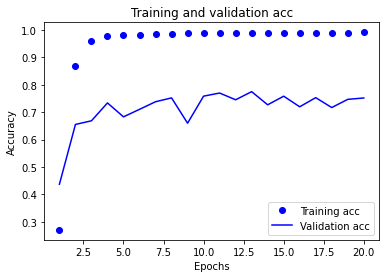

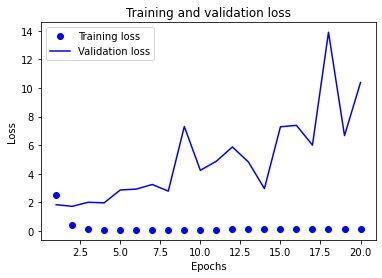

In [57]:
history_dict = history.history
history_dict.keys()
accPlot()
lossPlot()

In [58]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten()) 
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(29, activation='softmax'))
model.summary()

model.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'],)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_145 (Conv2D)          (None, 48, 48, 16)        448       
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 46, 46, 16)        2320      
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 44, 44, 16)        2320      
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 22, 22, 16)        0         
_________________________________________________________________
conv2d_148 (Conv2D)          (None, 20, 20, 32)        4640      
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 18, 18, 32)        9248      
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 16, 16, 32)      

In [59]:
history = model.fit(
      train_generator,
      steps_per_epoch=800,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=300)

Epoch 1/20
800/800 [==============================] - 179s 222ms/step - loss: 2.1815 - accuracy: 0.3368 - val_loss: 2.0036 - val_accuracy: 0.4351
Epoch 2/20
800/800 [==============================] - 158s 198ms/step - loss: 0.6711 - accuracy: 0.7750 - val_loss: 1.9798 - val_accuracy: 0.5398
Epoch 3/20
800/800 [==============================] - 159s 198ms/step - loss: 0.2710 - accuracy: 0.9096 - val_loss: 2.5227 - val_accuracy: 0.5194
Epoch 4/20
800/800 [==============================] - 166s 207ms/step - loss: 0.1569 - accuracy: 0.9515 - val_loss: 2.0782 - val_accuracy: 0.6284
Epoch 5/20
800/800 [==============================] - 161s 201ms/step - loss: 0.1039 - accuracy: 0.9697 - val_loss: 2.2213 - val_accuracy: 0.6629
Epoch 6/20
800/800 [==============================] - 171s 214ms/step - loss: 0.0832 - accuracy: 0.9763 - val_loss: 1.9128 - val_accuracy: 0.6556
Epoch 7/20
800/800 [==============================] - 165s 206ms/step - loss: 0.0674 - accuracy: 0.9808 - val_loss: 2.0074 -

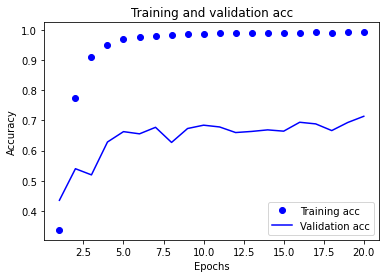

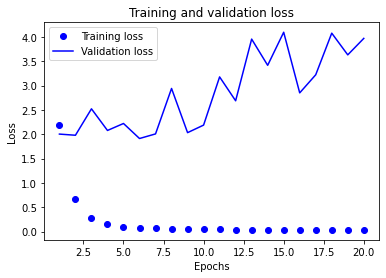

In [60]:
history_dict = history.history
history_dict.keys()
accPlot()
lossPlot()

# Adam optimizer

In [61]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten()) 
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(29, activation='softmax'))
model.summary()

model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'],)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_154 (Conv2D)          (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_155 (Conv2D)          (None, 46, 46, 32)        9248      
_________________________________________________________________
conv2d_156 (Conv2D)          (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_157 (Conv2D)          (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_158 (Conv2D)          (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_159 (Conv2D)          (None, 16, 16, 64)      

In [62]:
history = model.fit(
      train_generator,
      steps_per_epoch=800,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=300)

Epoch 1/20
800/800 [==============================] - 268s 329ms/step - loss: 1.4325 - accuracy: 0.5505 - val_loss: 1.7483 - val_accuracy: 0.5598
Epoch 2/20
800/800 [==============================] - 260s 325ms/step - loss: 0.2230 - accuracy: 0.9245 - val_loss: 1.9681 - val_accuracy: 0.6421
Epoch 3/20
800/800 [==============================] - 254s 318ms/step - loss: 0.1153 - accuracy: 0.9613 - val_loss: 1.7720 - val_accuracy: 0.6711
Epoch 4/20
800/800 [==============================] - 257s 321ms/step - loss: 0.0690 - accuracy: 0.9786 - val_loss: 1.9328 - val_accuracy: 0.6706
Epoch 5/20
800/800 [==============================] - 255s 319ms/step - loss: 0.0636 - accuracy: 0.9803 - val_loss: 1.7287 - val_accuracy: 0.6953
Epoch 6/20
800/800 [==============================] - 258s 323ms/step - loss: 0.0426 - accuracy: 0.9869 - val_loss: 1.7603 - val_accuracy: 0.6737
Epoch 7/20
800/800 [==============================] - 253s 316ms/step - loss: 0.0450 - accuracy: 0.9868 - val_loss: 2.4041 -

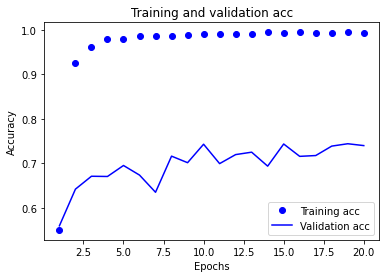

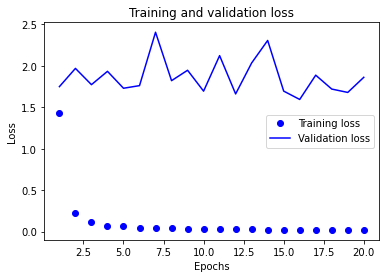

In [63]:
history_dict = history.history
history_dict.keys()
accPlot()
lossPlot()

# Tanh activation

In [64]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(50, 50, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='tanh'))
model.add(layers.Conv2D(32, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten()) 
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dense(29, activation='softmax'))
model.summary()

model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'],)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_163 (Conv2D)          (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_164 (Conv2D)          (None, 46, 46, 32)        9248      
_________________________________________________________________
conv2d_165 (Conv2D)          (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_166 (Conv2D)          (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_167 (Conv2D)          (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_168 (Conv2D)          (None, 16, 16, 64)      

In [65]:
history = model.fit(
      train_generator,
      steps_per_epoch=800,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=300)

Epoch 1/20
800/800 [==============================] - 260s 323ms/step - loss: 1.0350 - accuracy: 0.6963 - val_loss: 1.5061 - val_accuracy: 0.5895
Epoch 2/20
800/800 [==============================] - 259s 323ms/step - loss: 0.1802 - accuracy: 0.9460 - val_loss: 1.9046 - val_accuracy: 0.5779
Epoch 3/20
800/800 [==============================] - 263s 328ms/step - loss: 0.1353 - accuracy: 0.9577 - val_loss: 1.9459 - val_accuracy: 0.5923
Epoch 4/20
800/800 [==============================] - 257s 321ms/step - loss: 0.1200 - accuracy: 0.9602 - val_loss: 1.9674 - val_accuracy: 0.6116
Epoch 5/20
800/800 [==============================] - 251s 313ms/step - loss: 0.0893 - accuracy: 0.9711 - val_loss: 2.2062 - val_accuracy: 0.5787
Epoch 6/20
800/800 [==============================] - 252s 316ms/step - loss: 0.1007 - accuracy: 0.9671 - val_loss: 1.9315 - val_accuracy: 0.6203
Epoch 7/20
800/800 [==============================] - 255s 319ms/step - loss: 0.0781 - accuracy: 0.9741 - val_loss: 2.0850 -

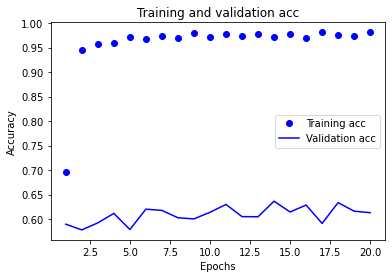

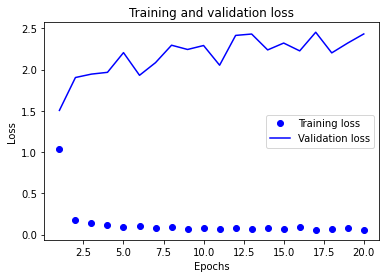

In [66]:
history_dict = history.history
history_dict.keys()
accPlot()
lossPlot()

In [67]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten()) 
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dense(29, activation='softmax'))
model.summary()

model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'],)

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_172 (Conv2D)          (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_173 (Conv2D)          (None, 46, 46, 32)        9248      
_________________________________________________________________
conv2d_174 (Conv2D)          (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_175 (Conv2D)          (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_176 (Conv2D)          (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_177 (Conv2D)          (None, 16, 16, 64)      

In [68]:
history = model.fit(
      train_generator,
      steps_per_epoch=800,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=300)

Epoch 1/20
800/800 [==============================] - 286s 355ms/step - loss: 1.1925 - accuracy: 0.6300 - val_loss: 1.0420 - val_accuracy: 0.7178
Epoch 2/20
800/800 [==============================] - 288s 360ms/step - loss: 0.1188 - accuracy: 0.9631 - val_loss: 1.0432 - val_accuracy: 0.7508
Epoch 3/20
800/800 [==============================] - 293s 366ms/step - loss: 0.0560 - accuracy: 0.9835 - val_loss: 1.0747 - val_accuracy: 0.7466
Epoch 4/20
800/800 [==============================] - 288s 360ms/step - loss: 0.0529 - accuracy: 0.9835 - val_loss: 1.1198 - val_accuracy: 0.7560
Epoch 5/20
800/800 [==============================] - 303s 379ms/step - loss: 0.0372 - accuracy: 0.9887 - val_loss: 1.2875 - val_accuracy: 0.7526
Epoch 6/20
800/800 [==============================] - 293s 367ms/step - loss: 0.0349 - accuracy: 0.9893 - val_loss: 1.2940 - val_accuracy: 0.7611
Epoch 7/20
800/800 [==============================] - 292s 365ms/step - loss: 0.0441 - accuracy: 0.9869 - val_loss: 1.2262 -

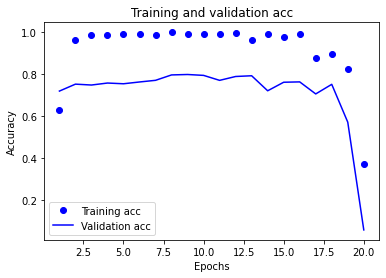

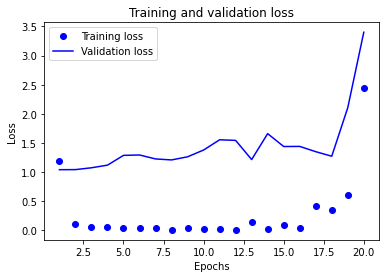

In [69]:
history_dict = history.history
history_dict.keys()
accPlot()
lossPlot()

In [70]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(50, 50, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='tanh'))
model.add(layers.Conv2D(32, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten()) 
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(29, activation='softmax'))
model.summary()

model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'],)

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_181 (Conv2D)          (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_182 (Conv2D)          (None, 46, 46, 32)        9248      
_________________________________________________________________
conv2d_183 (Conv2D)          (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_184 (Conv2D)          (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_185 (Conv2D)          (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_186 (Conv2D)          (None, 16, 16, 64)      

In [71]:
history = model.fit(
      train_generator,
      steps_per_epoch=800,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=300)

Epoch 1/20
800/800 [==============================] - 275s 342ms/step - loss: 1.0813 - accuracy: 0.6790 - val_loss: 1.7735 - val_accuracy: 0.5402
Epoch 2/20
800/800 [==============================] - 272s 341ms/step - loss: 0.1962 - accuracy: 0.9378 - val_loss: 1.8387 - val_accuracy: 0.6009
Epoch 3/20
800/800 [==============================] - 274s 343ms/step - loss: 0.1220 - accuracy: 0.9603 - val_loss: 2.0224 - val_accuracy: 0.5953
Epoch 4/20
800/800 [==============================] - 273s 342ms/step - loss: 0.1222 - accuracy: 0.9594 - val_loss: 2.2056 - val_accuracy: 0.6142
Epoch 5/20
800/800 [==============================] - 276s 346ms/step - loss: 0.0995 - accuracy: 0.9670 - val_loss: 1.9884 - val_accuracy: 0.6344
Epoch 6/20
800/800 [==============================] - 274s 343ms/step - loss: 0.0948 - accuracy: 0.9688 - val_loss: 2.4615 - val_accuracy: 0.5867
Epoch 7/20
800/800 [==============================] - 276s 346ms/step - loss: 0.0944 - accuracy: 0.9682 - val_loss: 2.3262 -

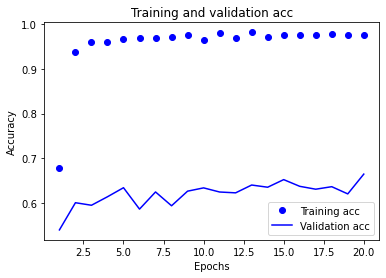

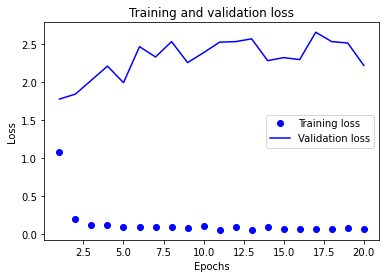

In [72]:
history_dict = history.history
history_dict.keys()
accPlot()
lossPlot()

# Dropout layers

In [73]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.2))

model.add(layers.Flatten()) 
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(29, activation='softmax'))
model.summary()

model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'],)

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_190 (Conv2D)          (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_191 (Conv2D)          (None, 46, 46, 32)        9248      
_________________________________________________________________
conv2d_192 (Conv2D)          (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_193 (Conv2D)          (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_194 (Conv2D)          (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_195 (Conv2D)          (None, 16, 16, 64)      

In [74]:
history = model.fit(
      train_generator,
      steps_per_epoch=800,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=300)

Epoch 1/20
800/800 [==============================] - 266s 327ms/step - loss: 1.7891 - accuracy: 0.4250 - val_loss: 1.5888 - val_accuracy: 0.5423
Epoch 2/20
800/800 [==============================] - 266s 333ms/step - loss: 0.3936 - accuracy: 0.8605 - val_loss: 1.1284 - val_accuracy: 0.7192
Epoch 3/20
800/800 [==============================] - 262s 327ms/step - loss: 0.1640 - accuracy: 0.9457 - val_loss: 1.2538 - val_accuracy: 0.7117
Epoch 4/20
800/800 [==============================] - 261s 326ms/step - loss: 0.1012 - accuracy: 0.9675 - val_loss: 1.2549 - val_accuracy: 0.7277
Epoch 5/20
800/800 [==============================] - 263s 329ms/step - loss: 0.0788 - accuracy: 0.9749 - val_loss: 1.6014 - val_accuracy: 0.7161
Epoch 6/20
800/800 [==============================] - 263s 328ms/step - loss: 0.0686 - accuracy: 0.9791 - val_loss: 1.3765 - val_accuracy: 0.7273
Epoch 7/20
800/800 [==============================] - 263s 328ms/step - loss: 0.0536 - accuracy: 0.9846 - val_loss: 1.1824 -

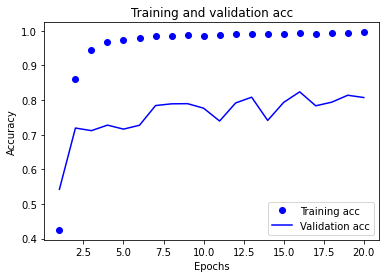

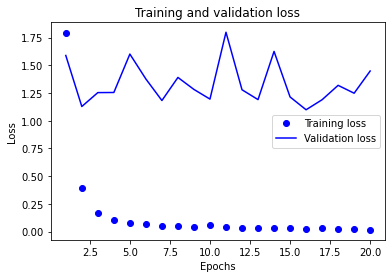

In [75]:
history_dict = history.history
history_dict.keys()
accPlot()
lossPlot()

In [76]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.4))

model.add(layers.Flatten()) 
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(29, activation='softmax'))
model.summary()

model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'],)

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_199 (Conv2D)          (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_200 (Conv2D)          (None, 46, 46, 32)        9248      
_________________________________________________________________
conv2d_201 (Conv2D)          (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_202 (Conv2D)          (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_203 (Conv2D)          (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 16, 16, 64)      

In [77]:
history = model.fit(
      train_generator,
      steps_per_epoch=800,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=300)

Epoch 1/20
800/800 [==============================] - 266s 331ms/step - loss: 2.2957 - accuracy: 0.3041 - val_loss: 1.4880 - val_accuracy: 0.5802
Epoch 2/20
800/800 [==============================] - 260s 325ms/step - loss: 0.4753 - accuracy: 0.8355 - val_loss: 1.3402 - val_accuracy: 0.7020
Epoch 3/20
800/800 [==============================] - 262s 327ms/step - loss: 0.2213 - accuracy: 0.9261 - val_loss: 1.4907 - val_accuracy: 0.7272
Epoch 4/20
800/800 [==============================] - 263s 328ms/step - loss: 0.1433 - accuracy: 0.9544 - val_loss: 1.1554 - val_accuracy: 0.7351
Epoch 5/20
800/800 [==============================] - 263s 329ms/step - loss: 0.0968 - accuracy: 0.9694 - val_loss: 1.3977 - val_accuracy: 0.7339
Epoch 6/20
800/800 [==============================] - 264s 330ms/step - loss: 0.0882 - accuracy: 0.9738 - val_loss: 1.4274 - val_accuracy: 0.7218
Epoch 7/20
800/800 [==============================] - 266s 333ms/step - loss: 0.0765 - accuracy: 0.9781 - val_loss: 1.2710 -

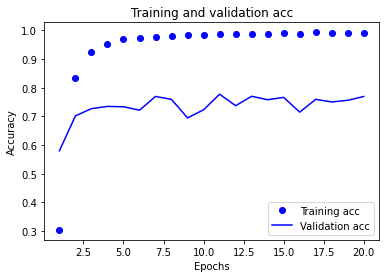

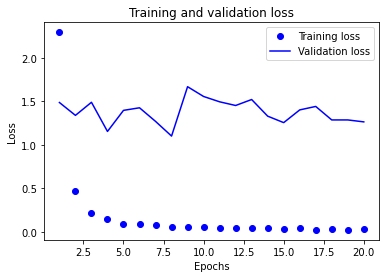

In [78]:
history_dict = history.history
history_dict.keys()
accPlot()
lossPlot()

In [79]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.5))

model.add(layers.Flatten()) 
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(29, activation='softmax'))
model.summary()

model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'],)

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_208 (Conv2D)          (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_209 (Conv2D)          (None, 46, 46, 32)        9248      
_________________________________________________________________
conv2d_210 (Conv2D)          (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_211 (Conv2D)          (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_212 (Conv2D)          (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_213 (Conv2D)          (None, 16, 16, 64)      

In [80]:
history = model.fit(
      train_generator,
      steps_per_epoch=800,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=300)

Epoch 1/20
800/800 [==============================] - 266s 332ms/step - loss: 2.3151 - accuracy: 0.2832 - val_loss: 1.4515 - val_accuracy: 0.5239
Epoch 2/20
800/800 [==============================] - 265s 331ms/step - loss: 0.5023 - accuracy: 0.8211 - val_loss: 0.9373 - val_accuracy: 0.7403
Epoch 3/20
800/800 [==============================] - 264s 330ms/step - loss: 0.2069 - accuracy: 0.9310 - val_loss: 1.0278 - val_accuracy: 0.7464
Epoch 4/20
800/800 [==============================] - 266s 333ms/step - loss: 0.1262 - accuracy: 0.9607 - val_loss: 0.9638 - val_accuracy: 0.7861
Epoch 5/20
800/800 [==============================] - 263s 328ms/step - loss: 0.0913 - accuracy: 0.9728 - val_loss: 1.1151 - val_accuracy: 0.7889
Epoch 6/20
800/800 [==============================] - 263s 329ms/step - loss: 0.0783 - accuracy: 0.9772 - val_loss: 1.2288 - val_accuracy: 0.7949
Epoch 7/20
800/800 [==============================] - 265s 331ms/step - loss: 0.0742 - accuracy: 0.9795 - val_loss: 0.9780 -

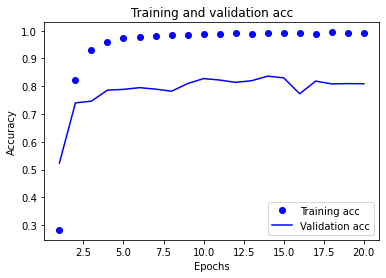

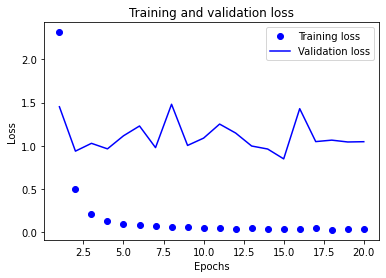

In [81]:
history_dict = history.history
history_dict.keys()
accPlot()
lossPlot()

# L1 and L2 regularisation

In [84]:
from keras.regularizers import l2
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()


model.add(layers.Conv2D(32, (3, 3), kernel_regularizer=l2(0.001), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.Conv2D(32, (3, 3), kernel_regularizer=l2(0.01), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), kernel_regularizer=l2(0.01), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l2(0.01), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l2(0.01), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=l2(0.01), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), kernel_regularizer=l2(0.01), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), kernel_regularizer=l2(0.01), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), kernel_regularizer=l2(0.01), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.5))

model.add(layers.Flatten()) 
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(29, activation='softmax'))
model.summary()

model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'],)

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_217 (Conv2D)          (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_218 (Conv2D)          (None, 46, 46, 32)        9248      
_________________________________________________________________
conv2d_219 (Conv2D)          (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_220 (Conv2D)          (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_221 (Conv2D)          (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_222 (Conv2D)          (None, 16, 16, 64)      

In [85]:
history = model.fit(
      train_generator,
      steps_per_epoch=800,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=300)

Epoch 1/20
800/800 [==============================] - 314s 391ms/step - loss: 3.4965 - accuracy: 0.0348 - val_loss: 3.3626 - val_accuracy: 0.0342
Epoch 2/20
800/800 [==============================] - 305s 382ms/step - loss: 3.3635 - accuracy: 0.0339 - val_loss: 3.3633 - val_accuracy: 0.0348
Epoch 3/20
800/800 [==============================] - 304s 380ms/step - loss: 3.3637 - accuracy: 0.0336 - val_loss: 3.3627 - val_accuracy: 0.0352
Epoch 4/20
800/800 [==============================] - 310s 387ms/step - loss: 3.3634 - accuracy: 0.0345 - val_loss: 3.3633 - val_accuracy: 0.0347
Epoch 5/20
800/800 [==============================] - 309s 386ms/step - loss: 3.3633 - accuracy: 0.0336 - val_loss: 3.3630 - val_accuracy: 0.0347
Epoch 6/20
800/800 [==============================] - 311s 388ms/step - loss: 3.3633 - accuracy: 0.0337 - val_loss: 3.3628 - val_accuracy: 0.0348
Epoch 7/20
800/800 [==============================] - 313s 391ms/step - loss: 3.3632 - accuracy: 0.0342 - val_loss: 3.3628 -

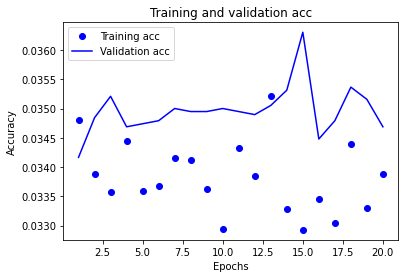

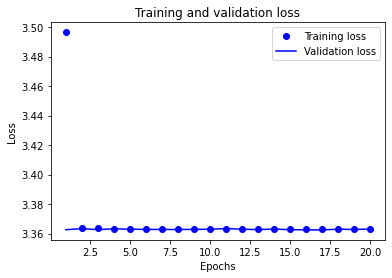

In [86]:
history_dict = history.history
history_dict.keys()
accPlot()
lossPlot()

# Data Augmentation

In [87]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True
    )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(50, 50),
        batch_size=64,
        class_mode='categorical',
        subset = 'training',
        shuffle = True)

validation_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(50, 50),
        batch_size=64,
        class_mode='categorical',
        shuffle=True,
        subset = 'validation'
        )
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(50, 50),
        batch_size=64,
        class_mode='categorical',
        subset = 'test'
        )

Found 53926 images belonging to 29 classes.
Found 23082 images belonging to 29 classes.
Found 14500 images belonging to 29 classes.


In [88]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.5))

model.add(layers.Flatten()) 
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(29, activation='softmax'))
model.summary()

model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'],)

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_226 (Conv2D)          (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_227 (Conv2D)          (None, 46, 46, 32)        9248      
_________________________________________________________________
conv2d_228 (Conv2D)          (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_229 (Conv2D)          (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_230 (Conv2D)          (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_231 (Conv2D)          (None, 16, 16, 64)      

In [89]:
history = model.fit(
      train_generator,
      steps_per_epoch=800,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=300)

Epoch 1/20
800/800 [==============================] - 286s 356ms/step - loss: 3.0955 - accuracy: 0.0999 - val_loss: 2.7802 - val_accuracy: 0.1838
Epoch 2/20
800/800 [==============================] - 292s 364ms/step - loss: 2.2317 - accuracy: 0.2995 - val_loss: 1.9408 - val_accuracy: 0.3869
Epoch 3/20
800/800 [==============================] - 294s 367ms/step - loss: 1.6382 - accuracy: 0.4644 - val_loss: 1.6124 - val_accuracy: 0.4927
Epoch 4/20
800/800 [==============================] - 296s 371ms/step - loss: 1.3547 - accuracy: 0.5542 - val_loss: 1.5333 - val_accuracy: 0.5186
Epoch 5/20
800/800 [==============================] - 302s 378ms/step - loss: 1.1763 - accuracy: 0.6147 - val_loss: 1.3499 - val_accuracy: 0.5858
Epoch 6/20
800/800 [==============================] - 302s 377ms/step - loss: 1.0537 - accuracy: 0.6594 - val_loss: 1.3314 - val_accuracy: 0.5890
Epoch 7/20
800/800 [==============================] - 307s 384ms/step - loss: 0.9825 - accuracy: 0.6833 - val_loss: 1.1759 -

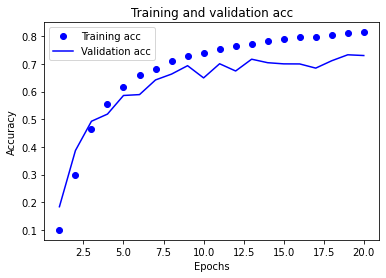

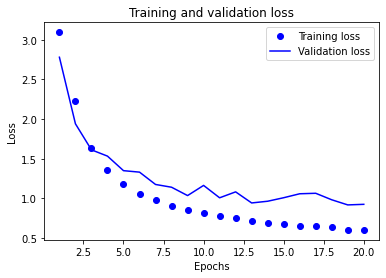

In [90]:
history_dict = history.history
history_dict.keys()
accPlot()
lossPlot()

In [92]:
history = model.fit(
      train_generator,
      steps_per_epoch=800,
      epochs=40,
      validation_data=validation_generator,
      validation_steps=300)
model.save("modelDataAug.h5")
print("Saved model to disk")

Epoch 1/40
800/800 [==============================] - 297s 371ms/step - loss: 0.5955 - accuracy: 0.8168 - val_loss: 0.9506 - val_accuracy: 0.7275
Epoch 2/40
800/800 [==============================] - 295s 368ms/step - loss: 0.5780 - accuracy: 0.8227 - val_loss: 0.9331 - val_accuracy: 0.7131
Epoch 3/40
800/800 [==============================] - 403s 504ms/step - loss: 0.5851 - accuracy: 0.8203 - val_loss: 0.8918 - val_accuracy: 0.7376
Epoch 4/40
800/800 [==============================] - 357s 446ms/step - loss: 0.5564 - accuracy: 0.8288 - val_loss: 0.8986 - val_accuracy: 0.7332
Epoch 5/40
800/800 [==============================] - 374s 467ms/step - loss: 0.5663 - accuracy: 0.8265 - val_loss: 0.8773 - val_accuracy: 0.7364
Epoch 6/40
800/800 [==============================] - 371s 464ms/step - loss: 0.5351 - accuracy: 0.8393 - val_loss: 0.8858 - val_accuracy: 0.7392
Epoch 7/40
800/800 [==============================] - 343s 429ms/step - loss: 0.5474 - accuracy: 0.8322 - val_loss: 0.9810 -

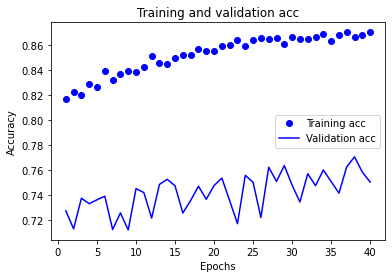

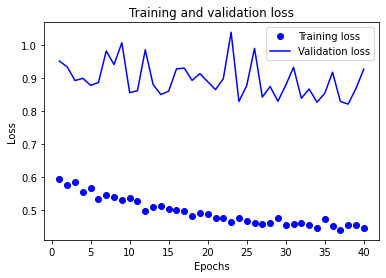

In [93]:
history_dict = history.history
history_dict.keys()
accPlot()
lossPlot()

In [101]:
import cv2
import tensorflow as tf

CATEGORIES = ["A", "B", "C", "D", "del", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "nothing" "O", "P", "Q", "R", "S", "space" "T", "U", "V", "W", "X", "Y", "Z",]  # will use this to convert prediction num to string value


def prepare(filepath):
    IMG_SIZE = 50  # 50 in txt-based
    img_array = cv2.imread(filepath)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(1, IMG_SIZE, IMG_SIZE, 3)  # return the image with shaping that TF wants.

model = tf.keras.models.load_model("/Users/mo/Documents/University/3rdYear/The Final Project folder/CNN model/modelDataAug.h5")

In [102]:
prediction = model.predict([prepare('M.jpg')])
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])


[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
A


In [103]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.5))

model.add(layers.Flatten()) 
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(29, activation='softmax'))
model.summary()

model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'],)

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_235 (Conv2D)          (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_236 (Conv2D)          (None, 46, 46, 32)        9248      
_________________________________________________________________
conv2d_237 (Conv2D)          (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_238 (Conv2D)          (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_239 (Conv2D)          (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_240 (Conv2D)          (None, 16, 16, 64)      

In [109]:
history = model.fit(
      test_generator,
      steps_per_epoch=200,
      epochs=10
      )
model.save("modelDataAug.h5")
print("Saved model to disk")

Epoch 1/10
200/200 [==============================] - 53s 262ms/step - loss: 0.3521 - accuracy: 0.8718
Epoch 2/10
200/200 [==============================] - 56s 280ms/step - loss: 0.2441 - accuracy: 0.9187
Epoch 3/10
200/200 [==============================] - 54s 269ms/step - loss: 0.1809 - accuracy: 0.9402
Epoch 4/10
200/200 [==============================] - 54s 270ms/step - loss: 0.1215 - accuracy: 0.9614
Epoch 5/10
200/200 [==============================] - 54s 268ms/step - loss: 0.1106 - accuracy: 0.9636
Epoch 6/10
200/200 [==============================] - 54s 269ms/step - loss: 0.0925 - accuracy: 0.9722
Epoch 7/10
200/200 [==============================] - 54s 270ms/step - loss: 0.0757 - accuracy: 0.9778
Epoch 8/10
200/200 [==============================] - 55s 274ms/step - loss: 0.0798 - accuracy: 0.9760
Epoch 9/10
200/200 [==============================] - 55s 276ms/step - loss: 0.0637 - accuracy: 0.9809
Epoch 10/10
200/200 [==============================] - 57s 284ms/step - l

In [111]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy'])

In [113]:
def TestaccPlot():
    history_dict['accuracy']

    plt.clf()
    acc = history_dict['accuracy']
    

    epochs = range(1, len(acc) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, acc, solid_blue_line, label = 'Test acc')
    plt.title('Test accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


In [116]:

def TestLossPlot():
    loss = history_dict['loss']
    epochs = range(1, len(loss) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, loss, solid_blue_line, label = 'Test loss')
    plt.title('Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

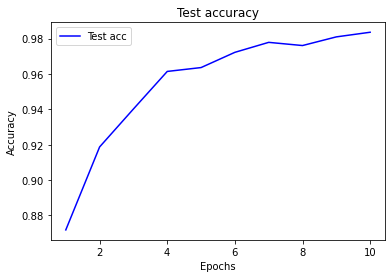

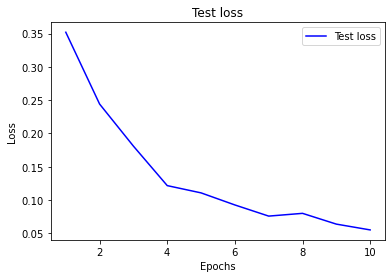

In [117]:
TestaccPlot()
TestLossPlot()